Die Kategorisierung der Handschrift dient sehr gut als Klassifizerungsaufgabe für unser Neuronales Netz. Es ist genügend unscharf und nicht zu schwierig. Ausserdem kann gezeigt werden, dass das NN auch mit großen Knotenmengen und Datenmengen umgehen kann.

<center><img src="files/4oder9.png" "Test" width=200px></center>

Das es hin und wieder auch für Menschen schwierig sein kann, die Klasse zuzuordnen zeigt obiges Bsp. Ist das nun eine 4 oder eine 9?

Wir nutzen dafür nun eine Datenbank mit Bildern handschriftlich geschriebener Ziffern, die gerne für diese Zwecke genutzt wird. Es handelt sich dabei um die MNIST-Datenbank von Yann LeCun.

WIr haben für unsere Zwecke einen Trainingsdatensatz mit 60.000 gekennzeichneten Beispielen und einen Testdatensatz mit 10.000 Beispielen (und Kennungen) zusammengestellt.

Am Besten man öffnet dafür mal die Datei mnist_test.csv in Excel.
Was steht darin:
    1. Wert des Labels. Also wie heißt die tatsächliche Ziffer, die das handgeschriebene Zeichen darstellen soll.
    2. Werte der Pixelwerte. Ein Ziffernbild besteht aus 28X28 Pixel, daher stehen 784 Werte nach der Kennung.


<center><img src="files/mnist_bild.png" "Test" width=600px></center>

Laden wir in unserem Fall einen etwas kleineren Datensatz erst mal ein.

In [2]:
data_file = open("data/mnist_dataset/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [3]:
#Anzeige der Länge der Liste
len(data_list)

100

In [5]:
#Inhalt der Liste ausgeben
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [6]:
#Import von diversen Bibliotheken unter anderem um die Inhalte grafisch darzustellen
import numpy
import matplotlib.pyplot
%matplotlib inline

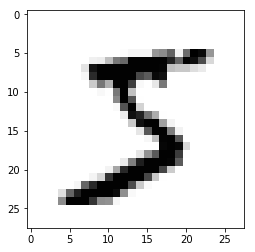

In [7]:
all_values = data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

Oben wird nun der erste Datensatz (eine 5) aufgrund der pixelinformationen grafisch angezeigt. Dies kann gerne auch mal für den 66.Datensatz getestet werden.

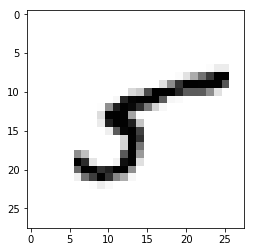

In [8]:
all_values = data_list[65].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

Um die Eingabewerte des Eingangsdatensatzes in unserem üblichen Format der Gewichte zwischen -1 und 1 zu haben, müssen wir zunächst die Daten der Pixelinformationen entsprechend skalieren. Dies ist ein wichtiger Schritt, da dies für zukünftige Netze entsprechend angepasst werden muss.

Folgende Schritte sind bei der Skalierung der Inhalte zu beachten: (Output ist eine Liste mit skalierten Werten zwischen 0 und 1)
1.  Die Werte in den Features liegen zwischen 0 und 255 -->Daher müssen alle Werte  durch 255 geteilt werden. Jetzt sind diese Werte im Bereich 0 bis 1
2. Um die Werte aus 1. auf 0,0 bis 0,99 zu bekommen müssen diese Werte mit 0,99 multipliziert werden.
3. Anschließend werden die Werte mit 0,01 addiert, sodass wir keine reinen 0-Werte bekommen.

Zu beachten sind folgende Begriffe 
1. all_values[1:] -->das heißt das jeweils alle Werte nach der ersten Spalte betroffen sind. In der ersten Spalte sind unsere Prüfwerte für unseren jeweiligen Datensatz (also das Label)
2. numpy.asfarray --> gibt einen Array zurück in dem die Werte Fließkommazahlen (Float) sein können

In [9]:
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

Wie sollten unsere Ausgabeknoten aussehen? Benötigen wir 728 Knoten? Nein. Es sind 10. also von 0 bis 9. Da wir auch nur 10 Ziffern haben. Er soll feuern wenn es die richtige Kennung getroffen hat. In folgendem Beispiel ist in derletzten Spalte zu 86% die Ziffer 9 zu erkennen. Das ist was wir haben wollen.

<center><img src="files/ausgabeschicht_mnist.png" "Test" width=600px></center>

In [10]:
#output nodes is 10 (example)
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

Was passiert nun in Zeile 10:
1. Die Anzahl an Ausgabeknoten wird auf 10 gesetzt.
2. numpy.zeros() erzeugt ein mit Nullen gefülltes Array. Größe und Gestalt des Arrays mit der Länge "onodes" wird als Parameter übergeben. HInzuaddiert wird 0,01 um reine Nullwerte zu vermeiden.
3. Zunächst wird hier die Kennung des MNIST-Datensatzes übernommen. Diese Kennung wird ein eine Ganzzahl gewandelt und mit dem array-index verbunden. 9 ist dann targets[9]

In [11]:
print(targets)

[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


Daraus ergibt sich dann vorerst folgender Code:

In [13]:
#######################################################################################
##################### 1. Import der benötigten Bibs ###################################
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

#######################################################################################
##################### 2. Anpassung der Variablen ######################################
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.3

# epochs is the number of times the training data set is used for training
epochs = 3

# load the mnist training data CSV file into a list
training_data_file = open("data/mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# load the mnist test data CSV file into a list
test_data_file = open("data/mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

#######################################################################################
##################### 3. Klasse des Neuronalen Netzes #################################
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

#######################################################################################
##################### 4. Erstellen eines Objekts der obigen Klasse ####################
    
# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

#######################################################################################
##################### 5. Das Netz basierend auf den Epochen trainieren ################
 

# train the neural network
for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

#######################################################################################
##################### 6. Das Netz auf Basis der Testdaten prüfen ######################

# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

#######################################################################################
##################### 7. Ausgabe der Genauigkeit des Netzes (Performance) #############

# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

#######################################################################################
#######################################################################################

performance =  0.6


1. 784 Eingabeknoten entsprechen den 784 Pixelinformationen
2. 100 Knoten der verdeckten Schicht sind quasi der Prüfstandard. Hintergrund ist, dass NN Features oder Muster erkennen sollen, die sich in kürzerer Form als der Anzahl Eingabedaten finden lässt.
3. 10 Ausgabeknoten entsprechen den 10 Ziffern.

HINWEIS: Es gibt keine perfekte Methode die Anzahl Knoten vorab mathematisch zu bestimmen. Hier gilt experimentieren.

Nebenden Trainingsdaten haben wir auch die Testdaten eingebunden.

Wir wollen nun mal schauen wie gut unser Training war. Dafür beziehen wir den ersten Datensatz aus dem Testdatensatz und lassen diesen uns grafisch wie auch per NN ermitteln.

In [16]:
# Ersten Datensatz auslesen
all_values=test_data_list[0].split(',')
# Ausgabe des Labels
print(all_values[0])

7


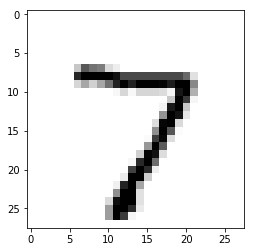

In [17]:
all_values = test_data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [18]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.07639331],
       [0.02302834],
       [0.03370781],
       [0.07291025],
       [0.05016883],
       [0.04172379],
       [0.00731594],
       [0.85197001],
       [0.05693837],
       [0.03002925]])

Was ist hier passiert:
1. In Zeile 16 lesen wir das Label (also die Kennung des ersten Datensatzes aus der Testreihe aus)
2. In Zeile 17 geben wir das grafische Abbild der Pixel dieses Datensatzes aus
3. In Zeile 18 lassen wir uns die Ausgabeknotenwerte anzeigen. Auch hier wird der siebte Knoten mit 85% am höchsten bewertet.

Das Ganze wird schlußendlich mittels einer For-Schleife für alle Datensätze getestet. Der entsprechende Quellcode zeigt sich in Zeile 19.
1. scorecard: Dies ist eine leere Trefferliste, welche nach jedem Datensatz aktualisiert wird. Dies dient dem späteren Messen der Performance.

In [19]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [20]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.6


Sollte die Antwort des Netzes mit der Antwort des Labels übereinstimmen, so wird für den Datensatz eine 1 ausgegeben, andernfalls eine 0. In Zeile 19 haben wir noch 4 Fehltreffer. Dies zeigt sich dann auch in der Performancemessung in Zeile 20.

Mit zunehmender Datenmenge wird dies genauer. Daher kann hier nun auch der größere Datensatz eingelesen werden.

## 4.1.1 Optimierungsmöglichkeiten

**Lernrate**: Unter Umständen muß die Lernrate zu einem späteren Zeitpunkt angepasst werden. Diese Lernrate wird notwendig um den Sprung im Gradientenverfahren nicht zu klein oder zu groß werden zu lassen.

<center><img src="files/gradientenverfahren_alpha_sprung.png" "Test" width=600px></center>

**Trainingswiederholungen**: Mit weiteren Anzahl Epochen wird derselbe Trainingsdatensatz erneut durchlaufen. Dies dient dazu den Gradientenabstieg zu verbessern.

**Mehr Daten**: Je größer die Datenmengen für das Training, desto genauer werden die Ergebnisse. 

**Netzstruktur ändern**: Anzahl der Knoten der versteckten Schicht anpassen.

In [23]:
#######################################################################################
##################### 1. Import der benötigten Bibs ###################################
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

#######################################################################################
##################### 2. Anpassung der Variablen ######################################
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.01

# epochs is the number of times the training data set is used for training
epochs = 10

# load the mnist training data CSV file into a list
training_data_file = open("data/mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# load the mnist test data CSV file into a list
test_data_file = open("data/mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

#######################################################################################
##################### 3. Klasse des Neuronalen Netzes #################################
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

#######################################################################################
##################### 4. Erstellen eines Objekts der obigen Klasse ####################
    
# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

#######################################################################################
##################### 5. Das Netz basierend auf den Epochen trainieren ################
 

# train the neural network
for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

#######################################################################################
##################### 6. Das Netz auf Basis der Testdaten prüfen ######################

# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

#######################################################################################
##################### 7. Ausgabe der Genauigkeit des Netzes (Performance) #############

# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

#######################################################################################
#######################################################################################

performance =  0.6
